## Multiple XRR calculations

If we want to perform theoretical calculations for multiple systems and suppress graphical output from _anaklasis_ so that we can visualize data the way we want, we may proceed as following. First let's import _anaklasis.ref_ and _matplotlib_ that we will use later for plotting stuff.

In [1]:
from anaklasis import ref
import matplotlib.pyplot as plt

We name the project as 'none' which results in no pdf plots or ASCII file output beeing generated by _anaklasis_

In [2]:
project='none'

We then define the instrumental parameters.

In [3]:
resolution=[0.001]
background = [1.0e-9]
scale = [1.0]
qmax = [0.7]

We then create two identical model _lists_ for (air/Au/Fe/Si) with the difference beeing in the thickness of the Fe layer.

In [4]:
model_A=[
	#  Re_sld  Im_sld   thk rough solv description
	[ 0.00e-5, 0.00e-7,  0 , 3.0, 0.0, 'air'],
	[ 12.4e-5, 1.28e-5, 50,  3.0, 0.0, 'Au'],
	[ 5.94e-5, 7.69e-6, 40 , 3.0, 0.0, 'Fe'],
	[ 2.00e-5, 4.58e-7,  0 , 0.0, 0.0, 'Si'],
	]

model_B=[
	#  Re_sld  Im_sld   thk rough solv description
	[ 0.00e-5, 0.00e-7,  0 , 3.0, 0.0, 'air'],
	[ 12.4e-5, 1.28e-5, 50,  3.0, 0.0, 'Au'],
	[ 5.94e-5, 7.69e-6, 80 , 3.0, 0.0, 'Fe'],
	[ 2.00e-5, 4.58e-7,  0 , 0.0, 0.0, 'Si'],
	]

For both systems we have a single patch on the substrate with 100% coverage, so

In [5]:
patches=[1.0]
system_A=[model_A]
system_B=[model_B]

we do not need to define any global parameters for this example

In [6]:
global_param = []

Then we call the _ref.calculate_ function for the two defined models and we store the results in the two dictionaries _results_A_ and _results_B_. Note that we set _plot=False_ since we do not need a summary plot to be exported.

In [7]:
results_A = ref.calculate(project, resolution, 
	patches, system_A, global_param, 
	background, scale, qmax, plot=False)

results_B = ref.calculate(project, resolution, 
	patches, system_B, global_param, 
	background, scale, qmax, plot=False)

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.3, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.001
--------------------------------------------------------------------
air real sld (10^-6 A^-2)      = 0.00 
air imaginary sld (10^-6 A^-2) = 0.00 
air thickness (A)              = 0.00 
air/Au roughness (A) = 3.00 
air solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Au real sld (10^-6 A^-2)      = 124.00 
Au imaginary sld (10^-6 A^-2) = 12.80 
Au thickness (A)              = 50.00 
Au/Fe roughness (A) = 3.00 
Au solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Fe real sld (10^-6 A^-2)      = 59.40 


the two _dictionaries_ contain data corresponding to calculated reflectivity, sld and solvent profile. We may use the appropriate 'keys' to produce a plot for the reflectivity of the two systems. Note that reflectivity and sld profile data are stored in the _dictionary_ in the form of _NumPy_ arrays. You may consult the _anaklasis_ API for a full description of the returned data structures.

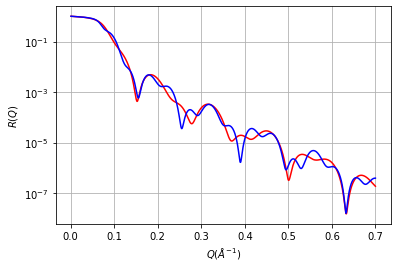

In [8]:
plt.figure()
plt.plot(results_A[("reflectivity")][:,0],results_A[("reflectivity")][:,1],color='red')
plt.plot(results_B[("reflectivity")][:,0],results_B[("reflectivity")][:,1],color='blue')
plt.yscale('log')
plt.xlabel(r'$Q(\AA^{-1})$')
plt.ylabel(r'$R(Q)$')
plt.grid(True)
plt.draw()

we may do the same for the sld profiles that are stored in the _dictionary_.  

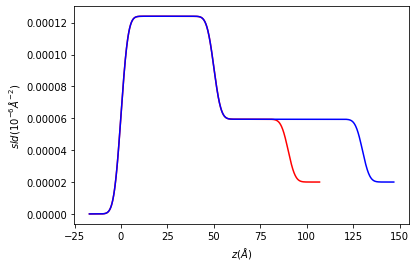

In [9]:
plt.figure()
plt.plot(results_A[("profile")][:,0],results_A[("profile")][:,1],color='red')
plt.plot(results_B[("profile")][:,0],results_B[("profile")][:,1],color='blue')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$sld(10^{-6}\AA^{-2})$')
plt.draw()
